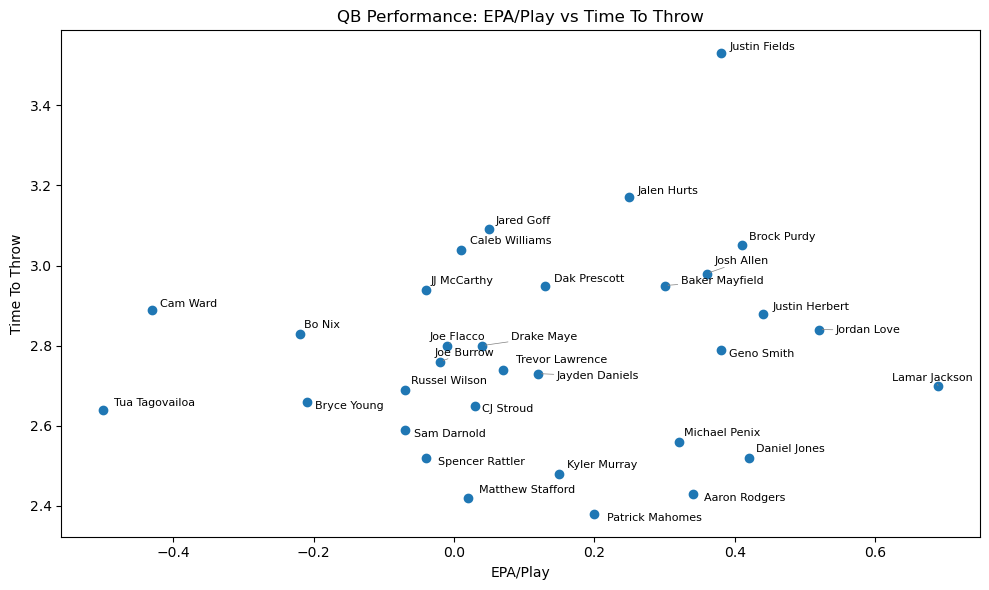

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Load your Excel file
file_path = "Downloads/NFL_Stats.xlsm"
df = pd.read_excel(file_path, sheet_name="Week 1")

x_axis = df["EPA/Play"]
y_axis = df["Time To Throw"]

plt.figure(figsize=(10, 6))
plt.scatter(x_axis, y_axis)

# Label axes
plt.xlabel("EPA/Play")
plt.ylabel("Time To Throw")
plt.title("QB Performance: EPA/Play vs Time To Throw")

# Create a list of text objects for adjustText to handle
texts = []
seen_positions = set()  # To keep track of already labeled positions
offset = 0.1  # A small offset to prevent overlap

for i, row in df.iterrows():
    qb_name = row["QB"]
    x_pos, y_pos = row["EPA/Play"], row["Time To Throw"]

    # Check if the point is already labeled (we add an offset if it is)
    if (x_pos, y_pos) in seen_positions:
        x_pos += offset
        y_pos += offset
    else:
        seen_positions.add((x_pos, y_pos))

    texts.append(plt.text(x_pos, y_pos, qb_name, fontsize=8))

# Automatically adjust text to reduce overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

image_path = "Downloads/qb_performance_plot.png"  # You can change the file name and format
plt.savefig(image_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()